# Importing Required Libraries

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import sys
import math

# Reading the Images


In [ ]:
#Reading images
cells = imageio.imread("cells_scale.png")
lena = imageio.imread("lena_translate.png")
pisa = imageio.imread("pisa_rotate.png")

# Bilinear Interpolation Function
Here we are creating a bilinear interpolation function so that we can use it for target to source mapping.

In [ ]:
def bilinear_interpolate(zero_padded_image, x, y):

    xx, yy = np.shape(zero_padded_image)# shape of the zero padded image
    xx, yy = xx-2, yy-2                 # get the shape of the original image
    x, y = x+1, y+1                     # +1 as we are taking coordinates with respect to a zero padded image

    x_prime, y_prime= math.floor(x),math.floor(y)# x', y', a, b as defined in the lecture

    a = x-x_prime
    b = y-y_prime

    if x_prime >= 0 and x_prime <= xx and y_prime >= 0 and y_prime <= yy:
        # intensity value using bilinear interpolation
        intensity_value = (1-a)*(1-b)*zero_padded_image[x_prime, y_prime] + (1-a)*b*zero_padded_image[x_prime, y_prime+1] \
        + a*(1-b)*zero_padded_image[x_prime+1, y_prime] + a*b*zero_padded_image[x_prime+1, y_prime+1]
    else:
        # If the (xs, ys) does not exist in the source image, assign 0 for the corresponding (xt, yt) in the target image
        intensity_value = 0

    return intensity_value

# Question 1 : Translation of Lena image
 Tx=3.75

 Ty=4.3

Padding the image with zero for use in bilinear interpolation.

In [ ]:
x, y = np.shape(lena)
padded_lena = np.zeros((x+2, y+2))
padded_lena[1:-1, 1:-1] = lena
translated_lena = np.zeros((x, y)) #a blank image matrix for containing the resulting image

In [ ]:
Tx=3.75                            #translation in x direction
Ty=4.3                             #translation in y direction
for Xt in range(x):
  for Yt in range(y):
    Xs = Xt-Tx
    Ys = Yt-Ty
    val = bilinear_interpolate(padded_lena, Xs, Ys)
    translated_lena[Xt, Yt] = val

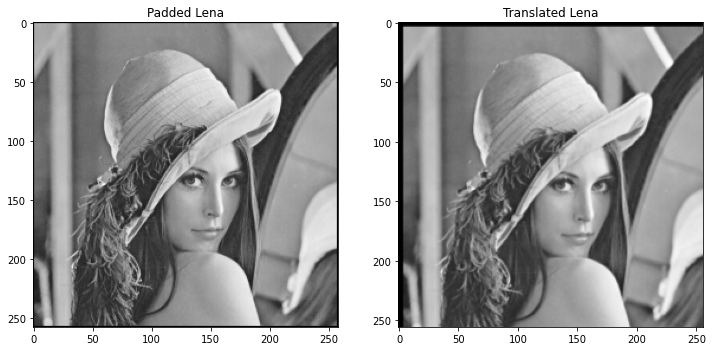

In [ ]:
#Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,14))
ax1.imshow(padded_lena, 'gray')
ax2.imshow(translated_lena, 'gray')
ax1.title.set_text("Padded Lena")
ax2.title.set_text("Translated Lena")
plt.show()

# Question 2 : Rotation of Pisa image
Theta=4 degrees

In [ ]:
theta= -4*np.pi/180   #converting theta to radians

Zero padding the image:

In [ ]:
x, y = np.shape(pisa)
padded_pisa = np.zeros((x+2, y+2))
padded_pisa[1:-1, 1:-1] = pisa
rotated_pisa = np.zeros((x, y)) #a blank matrix for containing the resulting image

In [ ]:
#The image is to be rotated about the centre of the image, so finding the image centre
center_x, center_y = x/2, y/2

for Xt in range(x):
  for Yt in range(y):
    # rotate about the center
    # To rotate around a point (x0, y0), we first translate to that point
    x_1, y_1 = Xt-center_x, Yt - center_y
                # Then we apply rotation as we would apply rotation around the origin and then translate back
    Xs = np.cos(theta)*x_1 - np.sin(theta)*y_1 + center_x
    Ys = np.cos(theta)*y_1 + np.sin(theta)*x_1 + center_y
    val = bilinear_interpolate(padded_pisa, Xs, Ys)
    rotated_pisa[Xt, Yt] = val

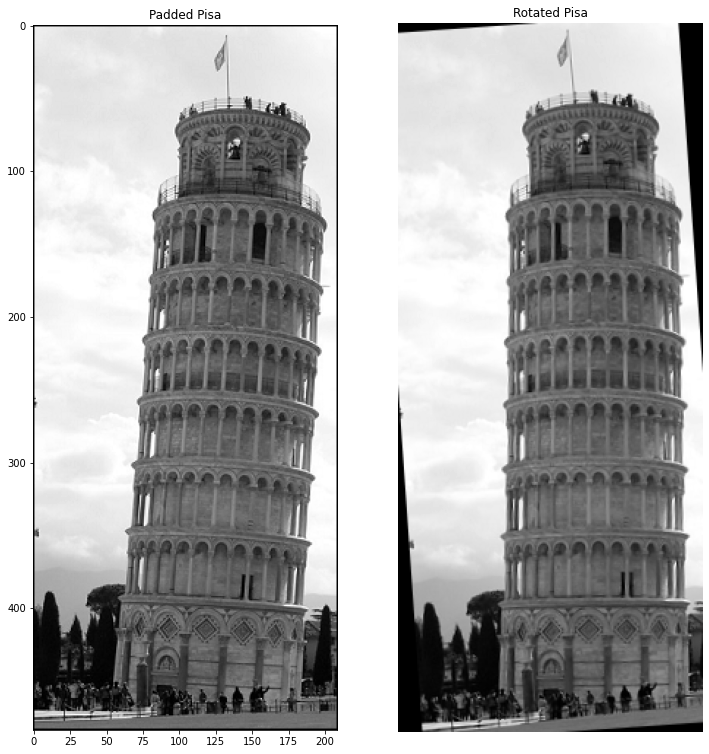

In [ ]:
#Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,14))
ax1.imshow(padded_pisa, 'gray')
ax2.imshow(rotated_pisa, 'gray')
ax1.title.set_text("Padded Pisa")
ax2.title.set_text("Rotated Pisa")
plt.axis('off')
plt.show()

# Question 3 : Scaling of Cells image
For scale = 0.8
Since, Scale factor < 1, This is a case of Zoom out

Padding the image:

In [ ]:
x, y = np.shape(cells)                #Shape of actual image
padded_cells = np.zeros((x+2, y+2))
padded_cells[1:-1, 1:-1] = cells
scaled_cells = np.zeros((x, y))       #a blank image matrix

In [ ]:
# center of the given image required for scaling about the center
center_x, center_y = x/2, y/2

In [ ]:
scale=0.8
for Xt in range(x):
  for Yt in range(y):

    Xs = (Xt-center_x)/scale+center_x
    Ys = (Yt-center_y)/scale+center_y
    val = bilinear_interpolate(padded_cells, Xs, Ys)
    scaled_cells[Xt, Yt] = val

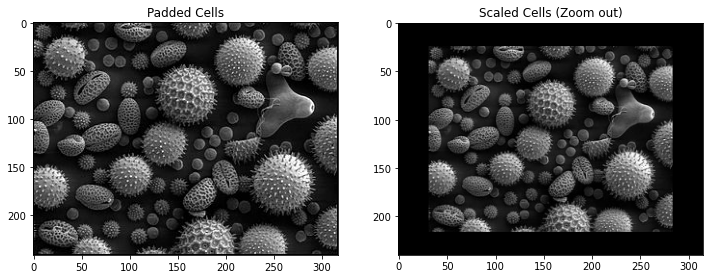

In [ ]:
#Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,14))
ax1.imshow(padded_cells, 'gray')
ax2.imshow(scaled_cells, 'gray')
ax1.title.set_text("Padded Cells")
ax2.title.set_text("Scaled Cells (Zoom out)")
plt.show()

For scale = 1.3
Since, Scale factor > 1, This is a case of Zoom in.

In [ ]:
scale=1.3
for Xt in range(x):
  for Yt in range(y):

    Xs = (Xt-center_x)/scale+center_x
    Ys = (Yt-center_y)/scale+center_y
    val = bilinear_interpolate(padded_cells, Xs, Ys)
    scaled_cells[Xt, Yt] = val

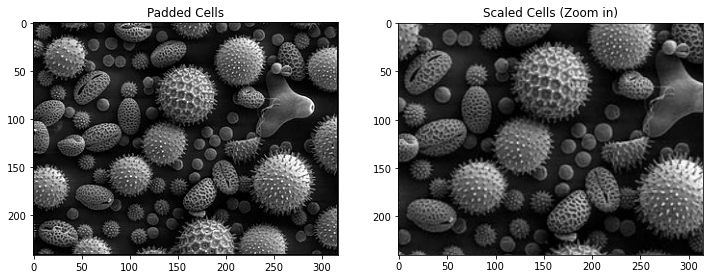

In [ ]:
#Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,14))
ax1.imshow(padded_cells, 'gray')
ax2.imshow(scaled_cells, 'gray')
ax1.title.set_text("Padded Cells")
ax2.title.set_text("Scaled Cells (Zoom in)")
plt.show()

#Observations

*  The black spaces in images stands for the zero intensity values as we do not have information for those pixels of image.
*  For rotation, here, we have used positive angles for CW rotation and negative angles for ACW rotation (in Pisa image we have taken -4 degrees for ACW rotation).

*  When the scaling factor is less then 1, the image is zoomed out.
*  When the scaling factor is greater than 1, the image is zoomed in.



